# Support Vector Machine

Support vector machines use sequential optimization method proposed by John C. Platt to effectively solve the dual optomization problem. This note implements this algorithm along with using linear kernels and gaussian kernels to classify mutiple sets of data. 

In the first part of this note, we will begin by with a 2D example dataset which can be separated by a linear boundary. The script will plot the training data. In this dataset, the positions of the positive examples and the negative examples suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left. We will also see how this outlier affects the SVM decision boundary.

In [16]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 17 16:29:231 2021

@author: zayn
"""

## Initialization
import sys
sys.path.append('../software/algorithms/')
from importlib import reload

import svm_cls as svm
import scipy.io
import numpy as np
import time
from sklearn.svm import SVC
reload(svm)

<module 'svm_cls' from '../software/algorithms\\svm_cls.py'>

## Part 1: Loading and Visualizing Data

We start this example application by first loading and visualizing the dataset. The following code will load the dataset and plot the data.


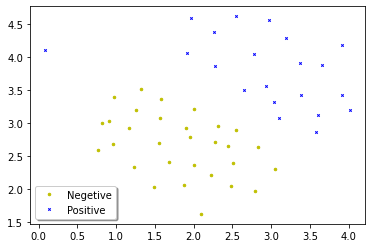

In [17]:
mat = scipy.io.loadmat('../data/svm_data/svmdata1.mat')

X=mat["X"]
y=mat["y"]
y=np.ravel(y)
svmal=svm.svmal()
# Plot training data
ax=svmal.plotData(X, y)

## Training Linear SVM 

The following code will train a linear SVM on the dataset and plot the decision boundary learned.

train acuracy using developed svm is 98.04%



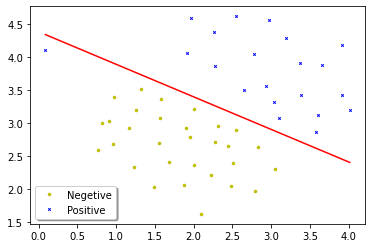

In [18]:

y_svm=-(-1)**y

C=10
tol=0.001
max_passes=20
ktype='linear'


svmal=svm.svmal(C=C, ktype=ktype)
svm_sam=svmal.svmz(X, y_svm,tol=0.001, max_passes=20)
alpha_vec=svm_sam.alphas
b=svm_sam.b
alphay=alpha_vec*y_svm
w=alphay@X
ax=svmal.plotData(X, y)
svmal.visualizeBoundryLinear(ax, w, b, X)
aa=svmal.score(X, y)
print('train acuracy using developed svm is {0:.2f}%\n'.format(aa*100))

Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly.

When C = 10, we find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left

## SVM with Gaussian Kernels

In this part of the note, we will use SVMs to do non-linear classification. In particular, we will use SVMs with Gaussian kernels on datasets that are not linearly separable.

### Example Dataset 2

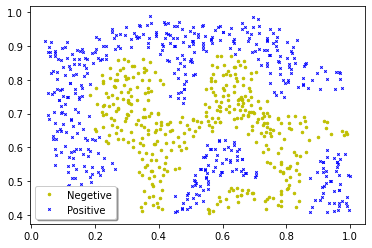

In [22]:
mat = scipy.io.loadmat('../data/svm_data/svmdata2.mat')

X=mat["X"]
y=mat["y"]
y=np.ravel(y)
y_svm=-(-1)**y
svmal=svm.svmal()
ax=svmal.plotData(X, y);

We first try standard sklearn support vector machine package on the data. We aim to comparison our algorithm speed and accuracy with that of sklean. We expect that sklearn would be much faster than our algorithm, most probably because it utilizes cython modules. Nevertheless, the developed algorithm should have almost the same accuracy with sklearn. 

In [21]:
C=1
tol=0.001
max_passes=20
gamma=50
ktype='rbf'
tic=time.time()
svco=SVC(C=C,kernel=ktype, gamma=gamma).fit(X,y)
toc=time.time()
pass_time=toc-tic
print('sklearn svm training lasted {0:.2f}s\n'.format(pass_time))    
percentage=svco.score(X,y)
print('train accuracy using sklearn svm is: {0:.2f}% \n'.format(percentage*100))

sklearn svm training lasted 0.01s

train accuracy using sklearn svm is: 98.96% 



Let's evaluated developed alghorith on the dataset. 

svm training lasted 15.17s

train acuracy using developed svm is 98.96%



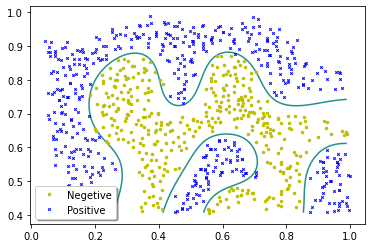

In [24]:
tic=time.time()

svmal=svm.svmal(C=C, ktype=ktype, gamma=gamma)
svm_sam=svmal.svmz(X, y_svm,tol, max_passes)
b=svm_sam.b
alpha_vec=svm_sam.alphas

toc=time.time()
pass_time=toc-tic
print('svm training lasted {0:.2f}s\n'.format(pass_time))

Xe=X[alpha_vec>0]
ye=y_svm[alpha_vec>0]
alpha_vece=alpha_vec[alpha_vec>0]
ax=svmal.plotData(X, y);

svmal.visualizeBoundry(ax, alpha_vece, b,Xe,ye, ktype, gamma)

aa=svmal.score(X, y)
print('train acuracy using developed svm is {0:.2f}%\n'.format(aa*100))

It's evident that these two developements of the algorithm have the same accuracy, but sklearn is much faster than our custom developed algorithm. 

### Example Dataset 3

This set of data also contains a validation data which can be used to optimize hyper parameters of the algorithm or asses prediction accuracy of the output model. The following code will load the next dataset and plot the data. 

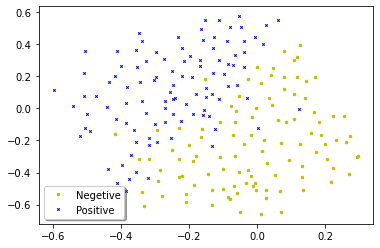

In [27]:
mat = scipy.io.loadmat('../data/svm_data/svmdata3.mat')

X=mat["X"]
y=mat["y"]
Xval=mat["Xval"]
yval=mat["yval"]
y=np.ravel(y)
y_svm=-(-1)**y
yval=np.ravel(yval)
ax=svmal.plotData(X, y);

Let's try sklearn svm on this dataset

In [28]:
C=1
tol=0.001
max_passes=20
gamma=50
ktype='rbf'

tic=time.time()

svco=SVC(C=C,kernel=ktype, gamma=gamma).fit(X,y)

toc=time.time()
pass_time=toc-tic
print('sklearn svm training lasted {0:.2f}s\n'.format(pass_time))    

        
percentage=svco.score(Xval,yval)
print('validation accuracy using sklearn svm is: {0:.2f}%\n'.format(percentage*100))

sklearn svm training lasted 0.00s

validation accuracy using sklearn svm is: 96.50%



developed svm applies on th same dataset

svm training lasted 1.14s

validation acuracy using developed svm is 96.50%



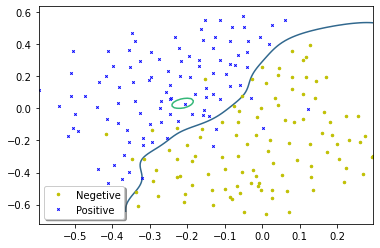

In [29]:
tic=time.time()

svmal=svm.svmal(C=C, ktype=ktype, gamma=gamma)
svm_sam=svmal.svmz(X, y_svm,tol, max_passes)
b=svm_sam.b
alpha_vec=svm_sam.alphas


toc=time.time()
pass_time=toc-tic
print('svm training lasted {0:.2f}s\n'.format(pass_time))

    

Xe=X[alpha_vec>0]
ye=y_svm[alpha_vec>0]
alpha_vece=alpha_vec[alpha_vec>0]
ax=svmal.plotData(X, y);
svmal.visualizeBoundry(ax, alpha_vece, b,Xe,ye, ktype, gamma)

aa=svmal.score(Xval, yval)
print('validation acuracy using developed svm is {0:.2f}%\n'.format(aa*100))

